In [216]:
import csv
import pandas as pd
from openpyxl import load_workbook, Workbook
data = load_workbook("Terrorism Data Ugly.xlsx", data_only = True)
sheet=data.active
max_row=sheet.max_row
max_column=sheet.max_column

#everything is contained in the first column of the data set. need to iterate through and make each one a dictionary
#linking words to their values
i = 0
french_terrorism = []
titles = sheet.cell(row=1,column=1)
title_list = titles.value
seperated = [x.strip() for x in title_list.split(',')]

counter = 0
failure = 0

for i in range (1,max_row):
    cell_obj=sheet.cell(row=i, column=1)
    thing=cell_obj.value
    result = [x.strip() for x in thing.split(',')]
    #If the country is France, and there is a full dataset, and somebody died in the attack
    if result[8] == "France" and len(result)>100 and result[98] != '0':
        french_terrorism.append(thing)
        
print('Length of French terrorism: ',len(french_terrorism))
#1112 events that were deadly, and have full datasets
#2678 total events in France

german_terrorism = []
for i in range (1,max_row):
    cell_obj=sheet.cell(row=i, column=1)
    thing=cell_obj.value
    result = [x.strip() for x in thing.split(',')]
    #If the country is Germany, and there is a full dataset, and somebody died in the attack
    if result[8] == "Germany" and len(result)>100 and result[98] != '0':
        german_terrorism.append(thing)
        
print('Length of German terrorism: ',len(german_terrorism))

dutch_terrorism = []
for i in range (1,max_row):
    cell_obj=sheet.cell(row=i, column=1)
    thing=cell_obj.value
    result = [x.strip() for x in thing.split(',')]
    #If the country is Brittain, and there is a full dataset, and somebody died in the attack
    if result[8] == "Netherlands" and len(result)>100 and result[98] != '0':
        dutch_terrorism.append(thing)
        
print('Length of Dutch terrorism: ',len(dutch_terrorism))

brittish_terrorism = []

for i in range (1,max_row):
    cell_obj=sheet.cell(row=i, column=1)
    thing=cell_obj.value
    result = [x.strip() for x in thing.split(',')]
    #If the country is Brittain, and there is a full dataset, and somebody died in the attack
    if result[8] == "United Kingdom" and len(result)>100 and result[98] != '0':
        brittish_terrorism.append(thing)
        
print('Length of Brittish terrorism: ',len(brittish_terrorism))
        
#Length of French terrorism:  1112
#Length of German terrorism:  279
#Length of Dutch terrorism:  55
#Length of Brittish terrorism:  3999


/anaconda/lib/python3.6/site-packages/openpyxl/reader/worksheet.py:307: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Length of French terrorism:  1112
Length of German terrorism:  279
Length of Dutch terrorism:  55
Length of Brittish terrorism:  3999


In [265]:
d=(len(dutch_islam))
b=(len(brittish_islam))
f=(len(french_islam))
g=(len(german_islam))

r=(d/55)*(100)
s=(b/3999)*(100)
t=(f/1112)*(100)
u=(g/279)*(100)
print("Dutch: ",r)
print("Brittish: ",s)
print("French: ",t)
print("German:",u)

#Dutch:  5.454545454545454
#Brittish:  0.7001750437609402
#French:  6.654676258992806
#German: 4.659498207885305

Dutch:  5.454545454545454
Brittish:  0.7001750437609402
French:  6.654676258992806
German: 4.659498207885305


Number of world events:  153135


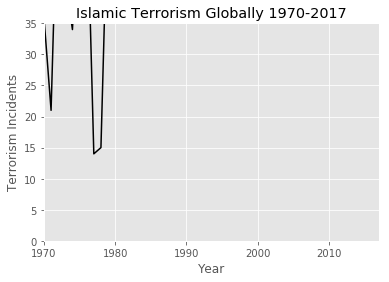

In [239]:
#World trends in terrorism and islamic terrorism 
world_terrorism= []
for i in range (1,max_row):
    cell_obj=sheet.cell(row=i, column=1)
    thing=cell_obj.value
    result = [x.strip() for x in thing.split(',')]
    #If there is a full dataset, and somebody died in the attack
    if len(result)>100 and result[98] != '0':
        world_terrorism.append(thing)
        
print ('Number of world events: ', len(world_terrorism))

world_islam = []
world_islam_year = []
world_islam_attacks = []
islamic_terrorism_world = copy.copy(world_terrorism)
#Find instances of terrorism that directly reference islamic terror 
for point in islamic_terrorism_world:
    s = [x.strip() for x in point.split(',')]
    point = point.lower()
    if 'muslim' in point:
        world_islam.append(point)
        world_islam_year.append(s[1])
    elif 'islam'  in point:
        world_islam.append(point)
        world_islam_year.append(s[1])
    elif 'jihad' in point:
        world_islam.append(point)
        world_islam_year.append(s[1])
    elif 'extremist' in point:
        world_islam.append(point)
        world_islam_year.append(s[1])
    else:
        pass

world_islam_graph=Counter(world_islam_year)
#uses Counter method to count the occurances of a year in the dataset
#print(french_islam_graph)
world_islam_x=[]
for item in world_islam_graph:
    world_islam_x.append(item)

for value in world_islam_graph:
    occurance = world_islam_graph[value]
    world_islam_attacks.append(occurance)
    
import csv
import matplotlib.pyplot as plt
plt.plot(world_islam_x,world_islam_attacks, 'k')
plt.axis([1970,2017,0,])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Islamic Terrorism Globally 1970-2017')
plt.show()

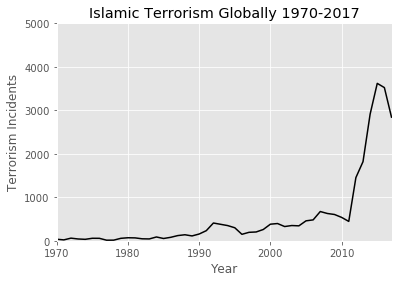

In [242]:
plt.plot(world_islam_x,world_islam_attacks, 'k')
plt.axis([1970,2017,0,5000])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Islamic Terrorism Globally 1970-2017')
plt.show()

In [217]:
#Islamic Terrorism 

import copy 
islamic_terrorism_france = copy.copy(french_terrorism)
for point in islamic_terrorism_france:
    s = [x.strip() for x in point.split(',')]
    if s[58] == 'Unknown':
        islamic_terrorism_france.remove(point)
    elif s[58] == "Corsican Nationalists" or "Armata di Liberazione Naziunale (ALN)" or "Gazteriak" or "Iparretarrak (IK)":
        islamic_terrorism_france.remove(point)
    elif "Basque" or "Corsi" or "Corsa" or "Corsican" or "Breton" in s[58]:
        islamic_terrorism_france.remove(point)
    elif s[40] != '69':
        islamic_terrorism_france.remove(point)
    else:
        pass
print(len(islamic_terrorism_france))
#Terrorism in France, that is not "unknown", not "FLNC", not corsican nationalists, and the target was French 
print(len(french_terrorism))

556
1112


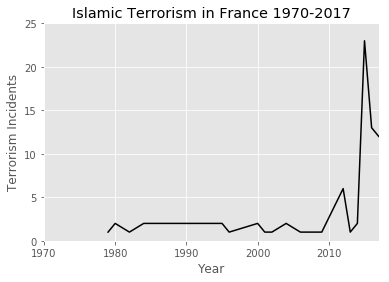

In [247]:
french_islam = []
french_islam_year = []
french_islam_attacks = []
islamic_terrorism_france = copy.copy(french_terrorism)
#Find instances of terrorism that directly reference islamic terror 
for point in islamic_terrorism_france:
    s = [x.strip() for x in point.split(',')]
    point = point.lower()
    if 'muslim' in point:
        french_islam.append(point)
        french_islam_year.append(s[1])
    elif 'islam'  in point:
        french_islam.append(point)
        french_islam_year.append(s[1])
    elif 'jihad' in point:
        french_islam.append(point)
        french_islam_year.append(s[1])
    #elif 'extremist' in point:
        #french_islam.append(point)
        #french_islam_year.append(s[1])
    else:
        pass

french_islam_graph=Counter(french_islam_year)
#uses Counter method to count the occurances of a year in the dataset
#print(french_islam_graph)
french_islam_x=[]
for item in french_islam_graph:
    french_islam_x.append(item)

for value in french_islam_graph:
    occurance = french_islam_graph[value]
    french_islam_attacks.append(occurance)
    
import csv
import matplotlib.pyplot as plt
plt.plot(french_islam_x,french_islam_attacks, 'k')
plt.axis([1970,2017,0,25])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Islamic Terrorism in France 1970-2017')
plt.show()

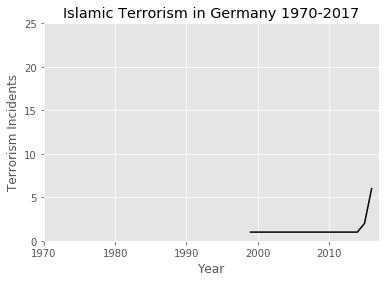

In [248]:
import copy 
islamic_terrorism_germany = copy.copy(german_terrorism)
for point in islamic_terrorism_germany:
    s = [x.strip() for x in point.split(',')]
    if s[58] == 'Unknown':
        islamic_terrorism_germany.remove(point)
    elif s[40] != '75':
        islamic_terrorism_germany.remove(point)
    else:
        pass

#Terrorism in France, that is not "unknown", not "FLNC", not corsican nationalists, and the target was French 

german_islam = []
german_islam_year = []
german_islam_attacks = []
#Find instances of terrorism that directly reference islamic terror 
for point in islamic_terrorism_germany:
    s = [x.strip() for x in point.split(',')]
    point = point.lower()
    if 'muslim' in point:
        german_islam.append(point)
        german_islam_year.append(s[1])
    elif 'islam'  in point:
        german_islam.append(point)
        german_islam_year.append(s[1])
    elif 'jihad' in point:
        german_islam.append(point)
        german_islam_year.append(s[1])
    #elif 'extremist' in point:
        #german_islam.append(point)
        #german_islam_year.append(s[1])
    else:
        pass

german_islam_graph=Counter(german_islam_year)
#uses Counter method to count the occurances of a year in the dataset
#print(french_islam_graph)
german_islam_x=[]
for item in german_islam_graph:
    german_islam_x.append(item)

for value in german_islam_graph:
    occurance = german_islam_graph[value]
    german_islam_attacks.append(occurance)
    
import csv
import matplotlib.pyplot as plt
plt.plot(german_islam_x,german_islam_attacks, 'k')
plt.axis([1970,2017,0,25])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Islamic Terrorism in Germany 1970-2017')
plt.show()



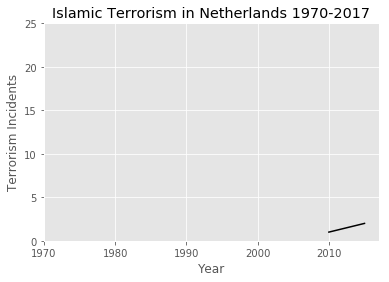

In [249]:
islamic_terrorism_netherlands = copy.copy(dutch_terrorism)
for point in islamic_terrorism_netherlands:
    s = [x.strip() for x in point.split(',')]
    if s[58] == 'Unknown':
        islamic_terrorism_netherlands.remove(point)
    elif s[40] != '142':
        islamic_terrorism_netherlands.remove(point)
    else:
        pass
dutch_islam = []
dutch_islam_year = []
dutch_islam_attacks = []
#Find instances of terrorism that directly reference islamic terror 
for point in islamic_terrorism_netherlands:
    s = [x.strip() for x in point.split(',')]
    point = point.lower()
    if 'muslim' in point:
        dutch_islam.append(point)
        dutch_islam_year.append(s[1])
    elif 'islam'  in point:
        dutch_islam.append(point)
        dutch_islam_year.append(s[1])
    elif 'jihad' in point:
        dutch_islam.append(point)
        dutch_islam_year.append(s[1])
    #elif 'extremist' in point:
        #dutch_islam.append(point)
        #dutch_islam_year.append(s[1])
    else:
        pass

dutch_islam_graph=Counter(dutch_islam_year)
#uses Counter method to count the occurances of a year in the dataset
#print(french_islam_graph)
dutch_islam_x=[]
for item in dutch_islam_graph:
    dutch_islam_x.append(item)

for value in dutch_islam_graph:
    occurance = dutch_islam_graph[value]
    dutch_islam_attacks.append(occurance)
    
import csv
import matplotlib.pyplot as plt
plt.plot(dutch_islam_x,dutch_islam_attacks, 'k')
plt.axis([1970,2017,0,25])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Islamic Terrorism in Netherlands 1970-2017')
plt.show()

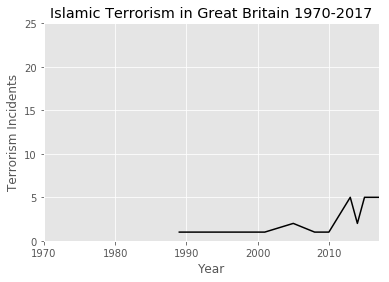

In [250]:
islamic_terrorism_brittain = copy.copy(brittish_terrorism)
for point in islamic_terrorism_brittain:
    s = [x.strip() for x in point.split(',')]
    if s[58] == 'Unknown':
        islamic_terrorism_brittain.remove(point)
    elif s[40] != '603':
        islamic_terrorism_brittain.remove(point)
    else:
        pass
brittish_islam = []
brittish_islam_year = []
brittish_islam_attacks = []
#Find instances of terrorism that directly reference islamic terror 
for point in islamic_terrorism_brittain:
    s = [x.strip() for x in point.split(',')]
    point = point.lower()
    if 'muslim' in point:
        brittish_islam.append(point)
        brittish_islam_year.append(s[1])
    elif 'islam'  in point:
        brittish_islam.append(point)
        brittish_islam_year.append(s[1])
    elif 'jihad' in point:
        brittish_islam.append(point)
        brittish_islam_year.append(s[1])
    #elif 'extremist' in point:
        #brittish_islam.append(point)
        #brittish_islam_year.append(s[1])
    else:
        pass

brittish_islam_graph=Counter(brittish_islam_year)
#uses Counter method to count the occurances of a year in the dataset
#print(french_islam_graph)
brittish_islam_x=[]
for item in brittish_islam_graph:
    brittish_islam_x.append(item)

for value in brittish_islam_graph:
    occurance = brittish_islam_graph[value]
    brittish_islam_attacks.append(occurance)
    
import csv
import matplotlib.pyplot as plt
plt.plot(brittish_islam_x,brittish_islam_attacks, 'k')
plt.axis([1970,2017,0,25])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Islamic Terrorism in Great Britain 1970-2017')
plt.show()

In [154]:
import xlwt 
from xlwt import Workbook
wb= Workbook()
sheet1=wb.add_sheet('Sheet 1')
box = 1
for y in islamic_terrorism_france:
    cross = 0
    s = [x.strip() for x in y.split(',')]
    for val in s:
        sheet1.write(box,cross, val)
        cross+=1
    box+=1
wb.save('Islamic Terrorism France 1.xls')

In [102]:
#french data
french_list_years = []
gtd_french_year=[]
gtd_french_attacks= []
#German data
german_list_years = []
gtd_german_year=[]
gtd_german_attacks= []
#dutch data
dutch_list_years = []
gtd_dutch_year=[]
gtd_dutch_attacks= []
#brittish data
brittish_list_years = []
gtd_brittish_year=[]
gtd_brittish_attacks= []

from collections import Counter
#z = ['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979','1980','1981','1982',
    #'1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996',
    #'1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
    #'2011','2012','2013','2014','2015','2016','2017']
#French data
for a in french_terrorism:
    splits = [x.strip() for x in a.split(',')]
    french_list_years.append(splits[1])

french_graph=Counter(french_list_years)
#uses Counter method to count the occurances of a year in the dataset
for item in french_graph:
    gtd_french_year.append(int(item))

for value in french_graph:
    occurance = french_graph[value]
    gtd_french_attacks.append(occurance)

#German Data
for a in german_terrorism:
    splits = [x.strip() for x in a.split(',')]
    german_list_years.append(splits[1])

german_graph=Counter(german_list_years)
#uses Counter method to count the occurances of a year in the dataset
for item in german_graph:
    gtd_german_year.append(int(item))

for value in german_graph:
    occurance = german_graph[value]
    gtd_german_attacks.append(occurance)

#Dutch Data
for a in dutch_terrorism:
    splits = [x.strip() for x in a.split(',')]
    dutch_list_years.append(splits[1])

dutch_graph=Counter(dutch_list_years)
#uses Counter method to count the occurances of a year in the dataset
for item in dutch_graph:
    gtd_dutch_year.append(int(item))

for value in dutch_graph:
    occurance = dutch_graph[value]
    gtd_dutch_attacks.append(occurance)

#Brittish data
for a in brittish_terrorism:
    splits = [x.strip() for x in a.split(',')]
    brittish_list_years.append(splits[1])

brittish_graph=Counter(brittish_list_years)
#uses Counter method to count the occurances of a year in the dataset
for item in brittish_graph:
    gtd_brittish_year.append(int(item))

for value in brittish_graph:
    occurance = brittish_graph[value]
    gtd_brittish_attacks.append(occurance)
 
    

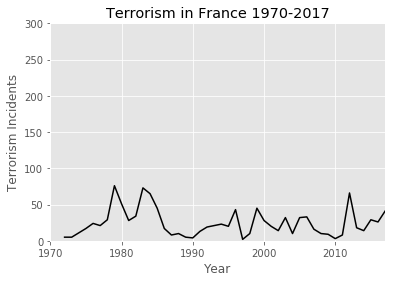

In [267]:
import csv
import matplotlib.pyplot as plt


#plots the year to the number of terrorist attacks found via the Counter method, France
plt.plot(gtd_french_year,gtd_french_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in France 1970-2017')
plt.show()


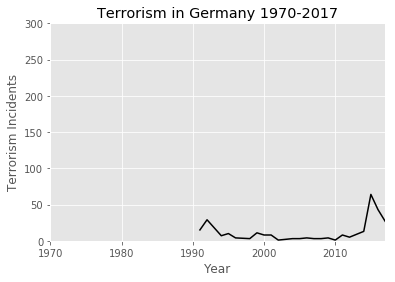

In [104]:
#plots the year to the number of terrorist attacks found via the Counter method, Germany
plt.plot(gtd_german_year,gtd_german_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in Germany 1970-2017')
plt.show()


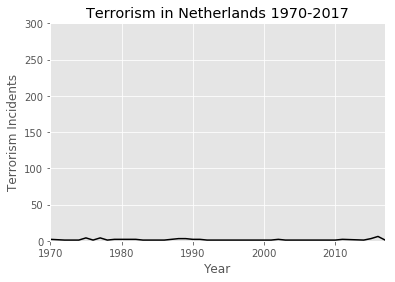

In [105]:
#plots the year to the number of terrorist attacks found via the Counter method, Dutch
plt.plot(gtd_dutch_year,gtd_dutch_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in Netherlands 1970-2017')
plt.show()


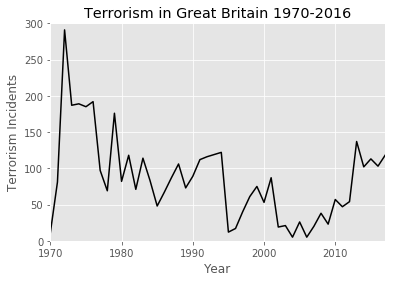

In [106]:
#plots the year to the number of terrorist attacks found via the Counter method, Brittish
plt.plot(gtd_brittish_year,gtd_brittish_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in Great Britain 1970-2016')
plt.show()


In [30]:
#for y in french_terrorism:
    #if "Corsica" or "FLNC" or "Armed Islamic Group (GIA)" in y[60]:
        #french_terrorism.remove(y)
#len(french_terrorism) 


for z in french_terrorism_copy:
    if z[99] == '0':
        french_terrorism_copy.remove(z)


len(french_terrorism_copy)

#1339 items without corsica of FLNC or GIA
#eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


    



2528

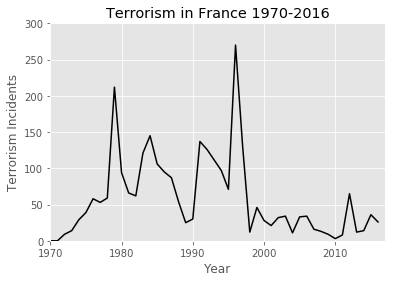

In [73]:
import csv
import matplotlib.pyplot as plt
french_year = []
french_attacks = []
counter = 0
with open('terrorist-incidents.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Code'] == "FRA":
    
            french_year.append(int(row['Year']))

            french_attacks.append(int(row['Terrorism incidents (GTD) (terrorism-related incidents)']))
            
            counter+=1

plt.plot(french_year,french_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in France 1970-2016')
plt.show()


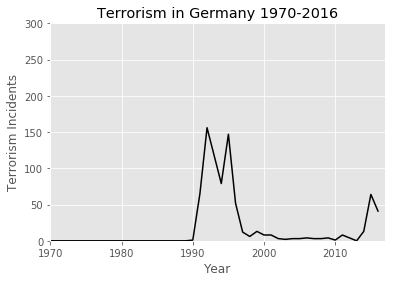

In [74]:
german_year = []
german_attacks = []
counter = 0
with open('terrorist-incidents.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Code'] == "DEU":
    
            german_year.append(int(row['Year']))

            german_attacks.append(int(row['Terrorism incidents (GTD) (terrorism-related incidents)']))
            
            counter+=1

plt.plot(german_year,german_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in Germany 1970-2016')
plt.show()


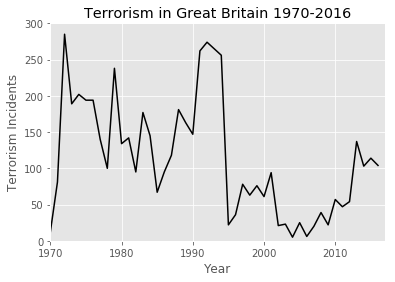

In [75]:
import csv
import matplotlib.pyplot as plt
brittish_year = []
brittish_attacks = []
counter = 0
with open('terrorist-incidents.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Code'] == "GBR":
    
            brittish_year.append(int(row['Year']))

            brittish_attacks.append(int(row['Terrorism incidents (GTD) (terrorism-related incidents)']))
            
            counter+=1

plt.plot(brittish_year,brittish_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in Great Britain 1970-2016')
plt.show()

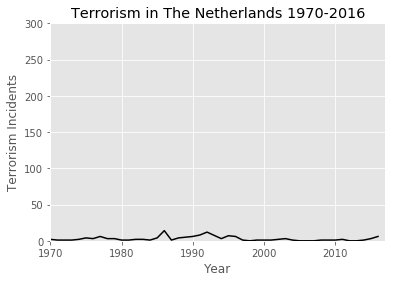

In [76]:
import csv
import matplotlib.pyplot as plt
dutch_year = []
dutch_attacks = []
counter = 0
with open('terrorist-incidents.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Code'] == "NLD":
    
            dutch_year.append(int(row['Year']))

            dutch_attacks.append(int(row['Terrorism incidents (GTD) (terrorism-related incidents)']))
            
            counter+=1

plt.plot(dutch_year,dutch_attacks, 'k')
plt.axis([1970,2017,0,300])
plt.xlabel('Year')
plt.ylabel('Terrorism Incidents')
plt.title('Terrorism in The Netherlands 1970-2016')
plt.show()

3.42021276596 -6801.48404255


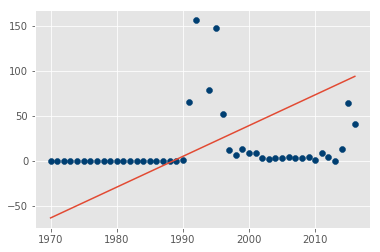

In [238]:
#calculates the line of best fit for the data. however, this is garbage data

import numpy as np
from statistics import mean
xs = np.array(german_year)
ys = np.array(german_attacks)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

regression_line = [(m*x)+b for x in xs]

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show() 

In [108]:
import csv

with open('global_terrorism_text.txt', mode='rb') as csv_file:
    csv_reader = csv_file.read()
    line_count = 0
    limiter = 0
    info = []
    for row in csv_reader:
        if line_count < 100:
            info.append(row)
            #print(row)
            line_count+=1
#print(info)
        #print()
                  
            #line_count += 1
        #print(f'\t{row["name"]} works in the {row["department"]} department, and was born in {row["birthday month"]}.')
        #line_count += 1
    #print(f'Processed {line_count} lines.')